<a href="https://colab.research.google.com/github/olfabre/amsProjetMaster1/blob/olivier/Generation_prenoms_V9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Appareil utilisé : cuda:0
Nombre de prénoms : 9286
Ensemble d'entraînement : 6500, Validation : 1857, Test : 929
Démarrage de l'entraînement...

-----------
|  ENTRAÎNEMENT  |
-----------


Époch 1 : La perte de validation a diminué à 3.8679. Modèle sauvegardé.
Précision validation : 0.0000

Prénoms générés :
- Acff
- Bff
- Ccff
- Dckff
- Ecfifff
0m 0.08s Époch 1/3000, Perte entraînement : 4.0897, Précision entraînement : 0.0000
Perte validation : 3.8679, Précision validation : 0.0000


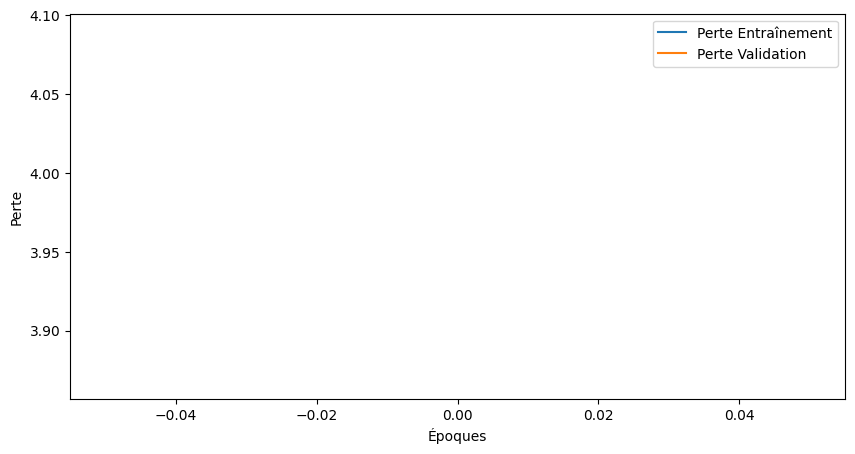

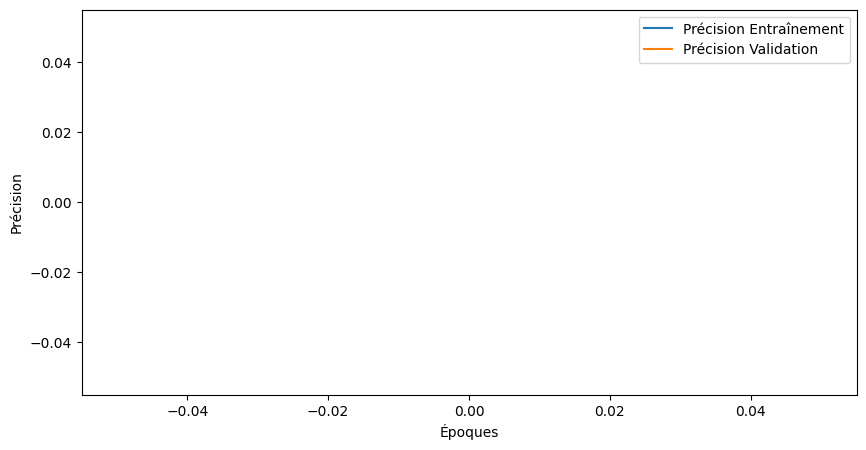


Époch 3 : La perte de validation a diminué à 3.5574. Modèle sauvegardé.
Précision validation : 0.1250

Prénoms générés :
- Ach
- Bch
- Cch
- Dch
- Echi

Époch 4 : La perte de validation a diminué à 3.5139. Modèle sauvegardé.
Précision validation : 0.1111

Prénoms générés :
- Ac
- Bc
- C
- Dc
- Ec

Époch 5 : La perte de validation a diminué à 3.1816. Modèle sauvegardé.
Précision validation : 0.1429

Prénoms générés :
- A
- Bch
- C
- D
- E

Époch 14 : La perte de validation a diminué à 3.0608. Modèle sauvegardé.
Précision validation : 0.3333

Prénoms générés :
- Aoovavavovaaaaaaaaaaa
- Bovvaaaaaavvvaaaaaaaa
- Covvaovvaaaaaaaaaaaaa
- Dovvaaaaaaaaaaaaaaaaa
- Eovvaaaavovvaaaaaaaaa

Époch 18 : La perte de validation a diminué à 2.8776. Modèle sauvegardé.
Précision validation : 0.1667

Prénoms générés :
- Aoin
- Boin
- Coin
- Doin
- Eiin

Époch 19 : La perte de validation a diminué à 2.5397. Modèle sauvegardé.
Précision validation : 0.1250

Prénoms générés :
- Aoi
- Boi
- Coi
- Dov
- Eo

Épo

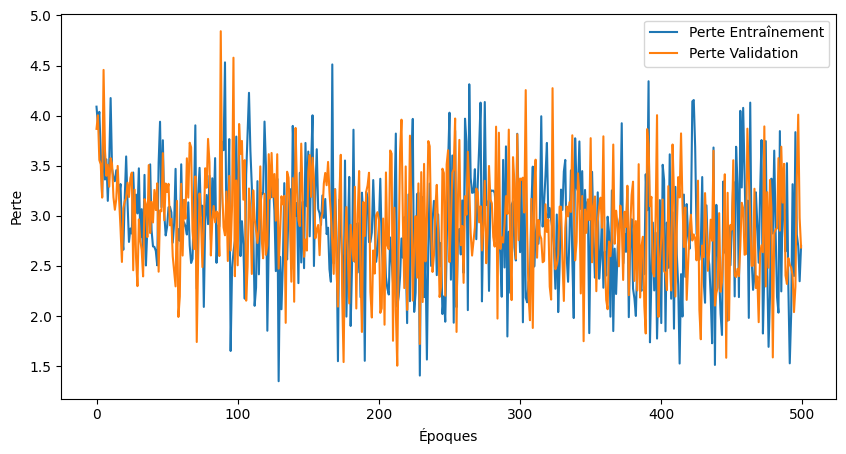

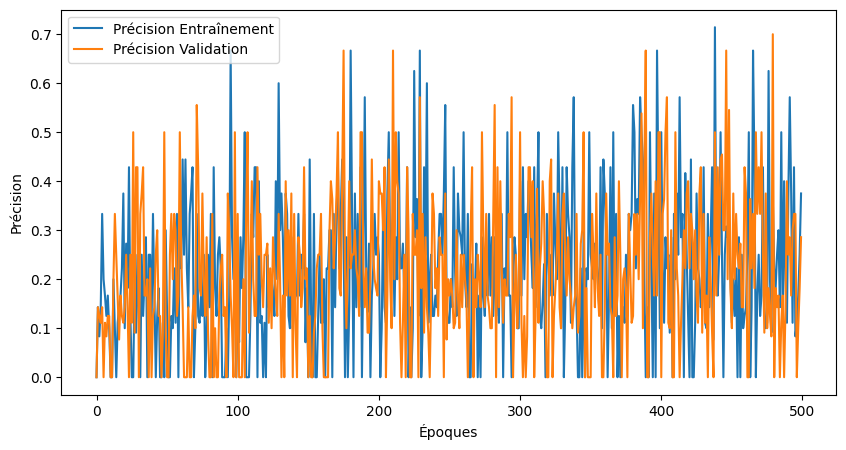


Époch 597 : La perte de validation a diminué à 1.4873. Modèle sauvegardé.
Précision validation : 0.8000

Prénoms générés :
- Aaraasky
- Balil
- Cin
- Dilitshihhlil
- Earaashakhhans

Époch 667 : La perte de validation a diminué à 1.3752. Modèle sauvegardé.
Précision validation : 0.4000

Prénoms générés :
- Aalovov
- Balalov
- Calov
- Dalov
- Ealov

Époch 771 : La perte de validation a diminué à 1.3246. Modèle sauvegardé.
Précision validation : 0.8000

Prénoms générés :
- Aalin
- Balula
- Calin
- Davilov
- Ealin

Époch 959 : La perte de validation a diminué à 0.8558. Modèle sauvegardé.
Précision validation : 0.8571

Prénoms générés :
- Aov
- Bov
- Cov
- Dorenov
- Eorkin
0m 24.17s Époch 1000/3000, Perte entraînement : 3.0825, Précision entraînement : 0.1250
Perte validation : 3.7234, Précision validation : 0.2222


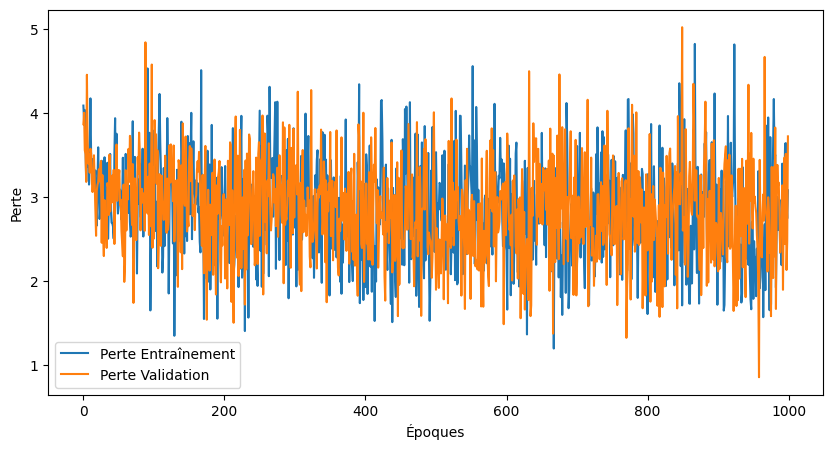

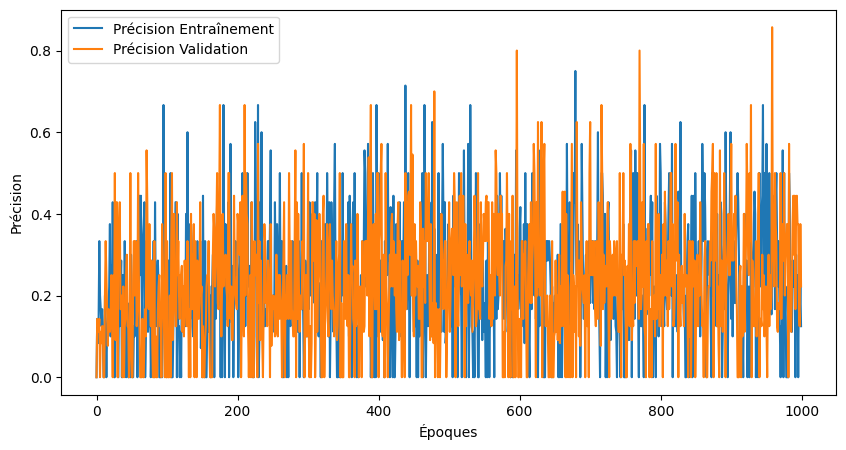

0m 35.64s Époch 1500/3000, Perte entraînement : 3.6106, Précision entraînement : 0.0909
Perte validation : 2.0759, Précision validation : 0.5455


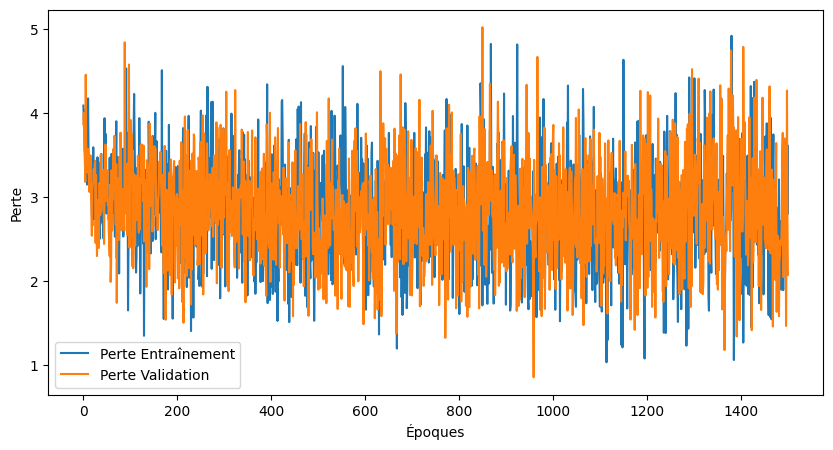

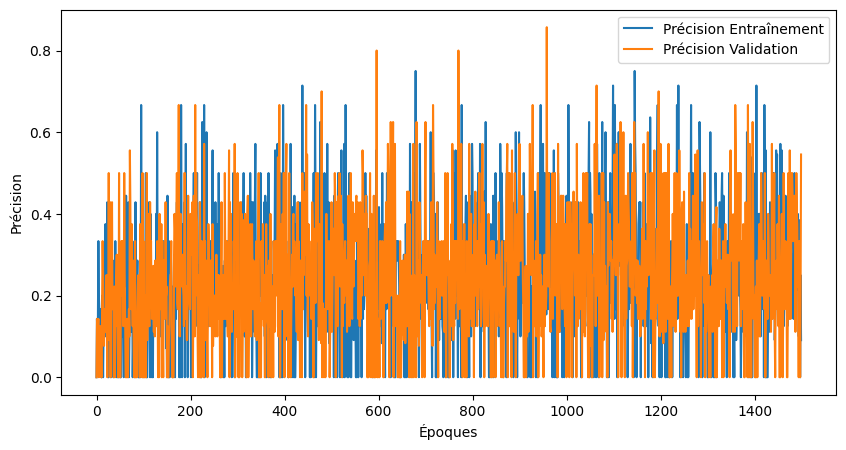

0m 47.09s Époch 2000/3000, Perte entraînement : 2.1354, Précision entraînement : 0.4000
Perte validation : 4.0913, Précision validation : 0.1250


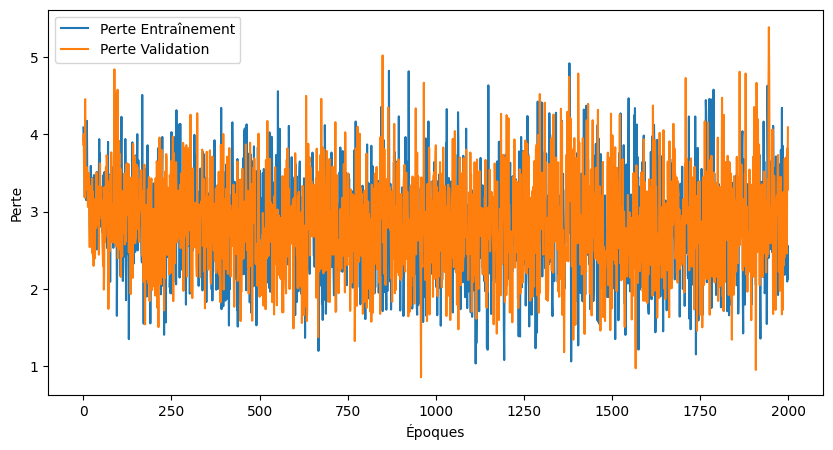

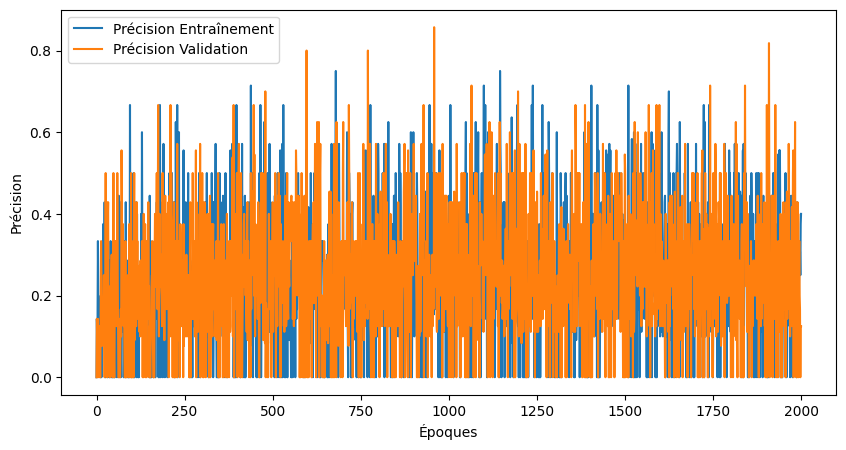

0m 58.56s Époch 2500/3000, Perte entraînement : 2.6559, Précision entraînement : 0.2500
Perte validation : 2.3235, Précision validation : 0.3333


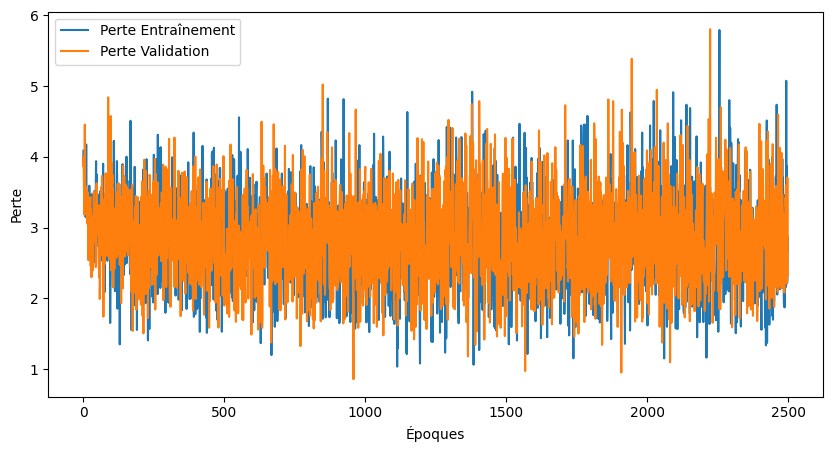

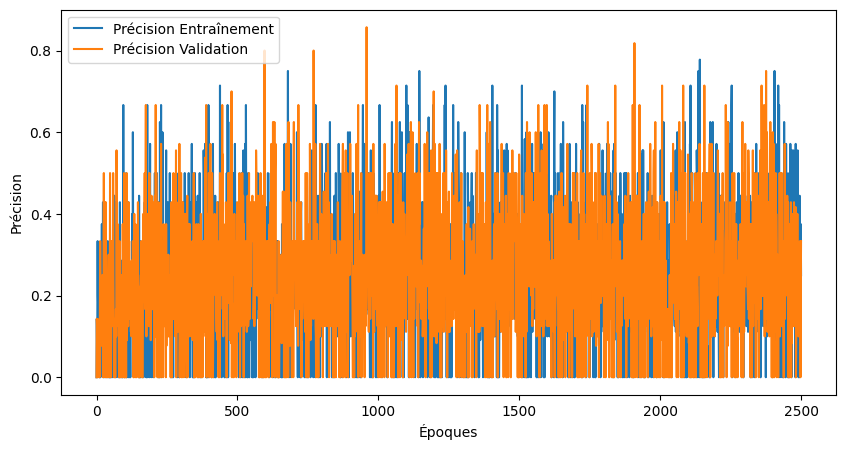

1m 10.20s Époch 3000/3000, Perte entraînement : 3.9611, Précision entraînement : 0.1429
Perte validation : 2.3488, Précision validation : 0.2500


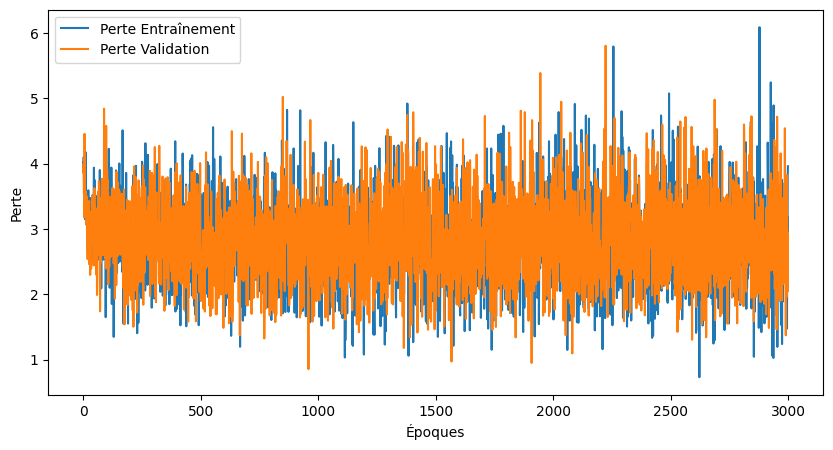

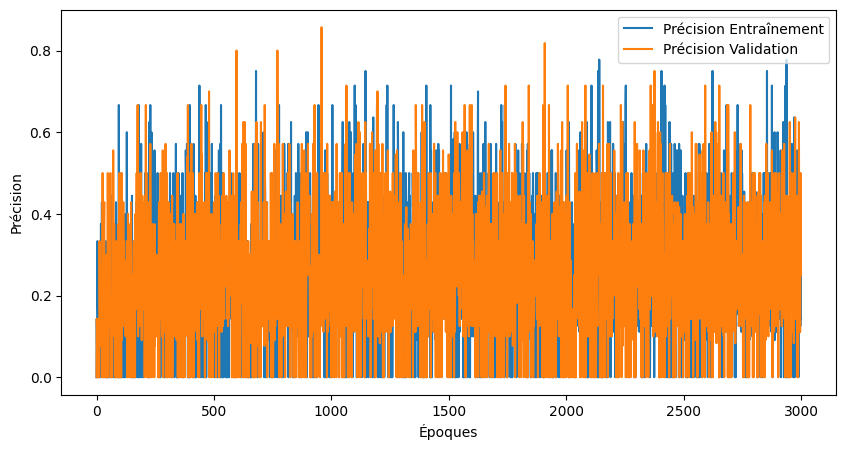


Chargement du meilleur modèle...

-----------
|  ÉVALUATION FINALE |
-----------

Perte moyenne sur l'ensemble de test : 2.5271
Précision moyenne sur l'ensemble de test : 0.2991

Prénoms générés avec le meilleur modèle :
- qov
- wov
- Vov
- Gov
- Dov
- Vov
- Rov
- pov
- wov
- qov
- Dov
- Nov
- Gov
- Gov
- jaranov
- Nov
- Oov
- dov
- Tov
- Wov


In [16]:
import requests
import torch
import torch.nn as nn
from torch.autograd import Variable
import time
import math
import string
import random
import os
import matplotlib.pyplot as plt

# Vérification GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Appareil utilisé : {device}")

# Téléchargement des données
url = "https://olivier-fabre.com/passwordgenius/russian.txt"
data_dir = "data"
os.makedirs(data_dir, exist_ok=True)
data_path = os.path.join(data_dir, "russian.txt")

if not os.path.exists(data_path):
    print("Téléchargement des données...")
    response = requests.get(url)
    with open(data_path, 'w', encoding='utf-8') as f:
        f.write(response.text)

# Chargement des données
def unicode_to_ascii(s):
    return ''.join(
        c for c in s if c in (string.ascii_letters + " .,;'-")
    )

def read_lines(filename):
    with open(filename, encoding='utf-8') as f:
        lines = f.readlines()

    # Filtrer et nettoyer les lignes
    clean_lines = []
    for line in lines:
        # Convertir en minuscules et supprimer les espaces autour
        line = line.strip().lower()
        # Vérifier que tous les caractères sont alphabétiques
        if all(c in string.ascii_letters for c in line) and len(line) >= 3:
            clean_lines.append(line)

    # Supprimer les doublons et trier les prénoms
    clean_lines = list(set(clean_lines))
    clean_lines.sort()

    return clean_lines




lines = read_lines(data_path)
print(f"Nombre de prénoms : {len(lines)}")

# Division des données
random.shuffle(lines)
train_split = int(0.7 * len(lines))
valid_split = int(0.2 * len(lines))
train_lines = lines[:train_split]
valid_lines = lines[train_split:train_split + valid_split]
test_lines = lines[train_split + valid_split:]
print(f"Ensemble d'entraînement : {len(train_lines)}, Validation : {len(valid_lines)}, Test : {len(test_lines)}")

# Paramètres globaux
all_letters = string.ascii_letters + " .,;'-"
n_letters = len(all_letters) + 1  # EOS marker
hidden_size = 256
n_layers = 3
lr = 0.003
bidirectional = True
max_length = 20
n_epochs = 3000

# Fonctions utilitaires
def char_tensor(string):
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = all_letters.index(string[c])
    return tensor

def input_tensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li in range(len(line)):
        letter = line[li]
        tensor[li][0][all_letters.find(letter)] = 1
    return tensor

def target_tensor(line):
    letter_indexes = [all_letters.find(line[li]) for li in range(1, len(line))]
    letter_indexes.append(n_letters - 1)  # EOS
    return torch.LongTensor(letter_indexes)

def random_training_example(lines):
    line = random.choice(lines)
    input_line_tensor = input_tensor(line)
    target_line_tensor = target_tensor(line)
    return input_line_tensor, target_line_tensor

# Fonction pour afficher le temps écoulé
def time_since(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return f"{m}m {s:.2f}s"

# Définition du modèle
class RNNLight(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNLight, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.bidirectional = bidirectional
        self.num_directions = 2 if self.bidirectional else 1
        self.rnn = nn.RNN(
            input_size=input_size, hidden_size=hidden_size,
            num_layers=n_layers, bidirectional=self.bidirectional, batch_first=True
        )
        self.out = nn.Linear(self.num_directions * hidden_size, output_size)
        self.dropout = nn.Dropout(0.1)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        _, hidden = self.rnn(input.unsqueeze(0), hidden)
        hidden_concat = hidden if not self.bidirectional else torch.cat((hidden[0], hidden[1]), 1)
        output = self.out(hidden_concat)
        output = self.dropout(output)
        return self.softmax(output), hidden

    def init_hidden(self):
        return torch.zeros(self.num_directions * n_layers, 1, self.hidden_size, device=device)

# Fonction pour générer des prénoms
def generate_prenoms(decoder, start_letters="ABCDE"):
    print("\nPrénoms générés :")
    for letter in start_letters:
        print(f"- {sample(decoder, letter)}")

def sample(decoder, start_letter="A"):
    with torch.no_grad():
        hidden = decoder.init_hidden()
        input = input_tensor(start_letter)
        output_name = start_letter
        for _ in range(max_length):
            output, hidden = decoder(input[0].to(device), hidden.to(device))
            topi = output.topk(1)[1][0][0]
            if topi == n_letters - 1:
                break
            else:
                letter = all_letters[topi]
                output_name += letter
            input = input_tensor(letter)
        return output_name

# Entraînement avec sauvegarde
def train(input_line_tensor, target_line_tensor, decoder, decoder_optimizer, criterion):
    target_line_tensor = target_line_tensor.to(device)
    hidden = decoder.init_hidden().to(device)
    decoder.zero_grad()
    loss = 0
    correct = 0  # Précision
    total = target_line_tensor.size(0)

    for i in range(input_line_tensor.size(0)):
        input_tensor = input_line_tensor[i].to(device)
        target_tensor = target_line_tensor[i].unsqueeze(0).to(device)
        output, hidden = decoder(input_tensor, hidden.detach())
        l = criterion(output, target_tensor)
        loss += l

        # Calcul de la précision
        predicted = output.topk(1)[1][0][0]
        correct += (predicted == target_tensor[0]).item()

    loss.backward()
    decoder_optimizer.step()

    accuracy = correct / total
    return loss.item() / input_line_tensor.size(0), accuracy

def validation(input_line_tensor, target_line_tensor, decoder, criterion):
    with torch.no_grad():
        target_line_tensor = target_line_tensor.to(device)
        hidden = decoder.init_hidden().to(device)
        loss = 0
        correct = 0
        total = target_line_tensor.size(0)

        for i in range(input_line_tensor.size(0)):
            input_tensor = input_line_tensor[i].to(device)
            target_tensor = target_line_tensor[i].unsqueeze(0).to(device)
            output, hidden = decoder(input_tensor, hidden.detach())
            l = criterion(output, target_tensor)
            loss += l

            # Calcul de la précision
            predicted = output.topk(1)[1][0][0]
            correct += (predicted == target_tensor[0]).item()

        accuracy = correct / total
        return loss.item() / input_line_tensor.size(0), accuracy

# Ajustement dynamique du taux d'apprentissage
def adjust_learning_rate(optimizer, epoch, decay_rate=0.5, step=20000):
    if epoch % step == 0 and epoch > 0:
        for param_group in optimizer.param_groups:
            param_group['lr'] *= decay_rate
            print(f"Taux d'apprentissage ajusté à : {param_group['lr']}")

# Suivi des pertes et précisions
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Fonction principale d'entraînement
def training(n_epochs, train_lines, valid_lines, decoder, decoder_optimizer, criterion):
    print("\n-----------\n|  ENTRAÎNEMENT  |\n-----------\n")
    start = time.time()
    best_loss = float("inf")
    model_path = "best_model_generation_prenom.pth"

    for epoch in range(1, n_epochs + 1):
        adjust_learning_rate(decoder_optimizer, epoch)

        input_line_tensor, target_line_tensor = random_training_example(train_lines)
        train_loss, train_acc = train(input_line_tensor, target_line_tensor, decoder, decoder_optimizer, criterion)

        input_line_tensor, target_line_tensor = random_training_example(valid_lines)
        val_loss, val_acc = validation(input_line_tensor, target_line_tensor, decoder, criterion)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        if val_loss < best_loss:
            best_loss = val_loss
            torch.save(decoder.state_dict(), model_path)
            print(f"\nÉpoch {epoch} : La perte de validation a diminué à {best_loss:.4f}. Modèle sauvegardé.")
            print(f"Précision validation : {val_acc:.4f}")
            generate_prenoms(decoder)

        if epoch % 500 == 0 or epoch == 1:
            print(f"{time_since(start)} Époch {epoch}/{n_epochs}, Perte entraînement : {train_loss:.4f}, Précision entraînement : {train_acc:.4f}")
            print(f"Perte validation : {val_loss:.4f}, Précision validation : {val_acc:.4f}")

            # Afficher les graphiques interactifs
            plt.figure(figsize=(10, 5))
            plt.plot(train_losses, label='Perte Entraînement')
            plt.plot(val_losses, label='Perte Validation')
            plt.legend()
            plt.xlabel('Époques')
            plt.ylabel('Perte')
            plt.show()

            plt.figure(figsize=(10, 5))
            plt.plot(train_accuracies, label='Précision Entraînement')
            plt.plot(val_accuracies, label='Précision Validation')
            plt.legend()
            plt.xlabel('Époques')
            plt.ylabel('Précision')
            plt.show()

# Évaluation finale
def evaluate_model(test_lines, decoder, criterion):
    print("\n-----------\n|  ÉVALUATION FINALE |\n-----------\n")
    total_loss = 0
    total_correct = 0
    total_samples = 0
    decoder.eval()

    with torch.no_grad():
        for line in test_lines:
            input_line_tensor = input_tensor(line)
            target_line_tensor = target_tensor(line)
            loss, acc = validation(input_line_tensor, target_line_tensor, decoder, criterion)
            total_loss += loss
            total_correct += acc * len(line)
            total_samples += len(line)

    avg_loss = total_loss / len(test_lines)
    avg_accuracy = total_correct / total_samples
    print(f"Perte moyenne sur l'ensemble de test : {avg_loss:.4f}")
    print(f"Précision moyenne sur l'ensemble de test : {avg_accuracy:.4f}")

    # Génération de 20 prénoms avec le meilleur modèle
    print("\nPrénoms générés avec le meilleur modèle :")
    for _ in range(20):
        start_letter = random.choice(all_letters)  # Démarrer avec une lettre aléatoire
        print(f"- {sample(decoder, start_letter)}")



# Exécution principale
if __name__ == "__main__":
    decoder = RNNLight(n_letters, hidden_size, n_letters).to(device)
    decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr, weight_decay=1e-5)
    criterion = nn.CrossEntropyLoss()

    print("Démarrage de l'entraînement...")
    training(n_epochs, train_lines, valid_lines, decoder, decoder_optimizer, criterion)

    print("\nChargement du meilleur modèle...")
    # Chargement sécurisé pour éviter tout code malveillant
    state_dict = torch.load("best_model_generation_prenom.pth", map_location=device, weights_only=True)
    decoder.load_state_dict(state_dict)
    evaluate_model(test_lines, decoder, criterion)

Appareil utilisé : cuda:0
Nombre de prénoms : 9286
Ensemble d'entraînement : 6500, Validation : 1857, Test : 929
Démarrage de l'entraînement...

-----------
|  ENTRAÎNEMENT  |
-----------


Époch 1 : La perte de validation a diminué à 4.0242. Modèle sauvegardé.
Précision validation : 0.0000

Prénoms générés :
- Acscvcvcvcvcvcvcvcvcc
- Bsschcccvcvcvcvcvcvcv
- Ccscvchcvcvcvcvcvccvc
- Dcccvcv
- Ecvcv
0m 0.12s Époch 1/3000, Perte entraînement : 4.0631, Précision entraînement : 0.0000
Perte validation : 4.0242, Précision validation : 0.0000


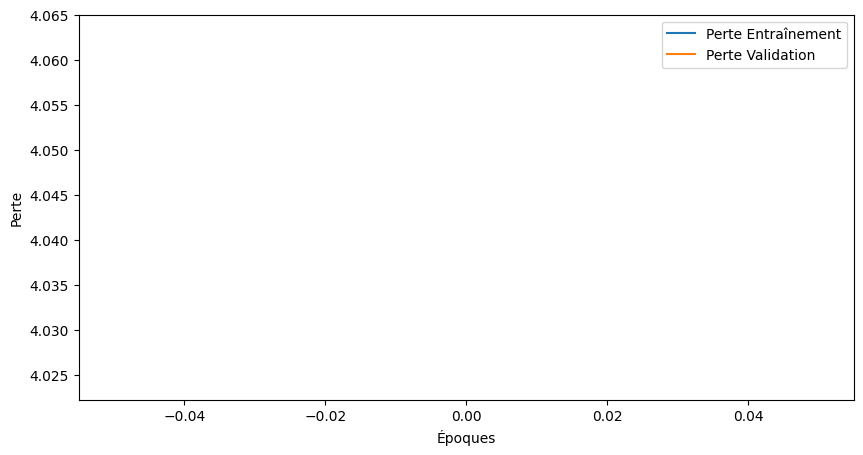

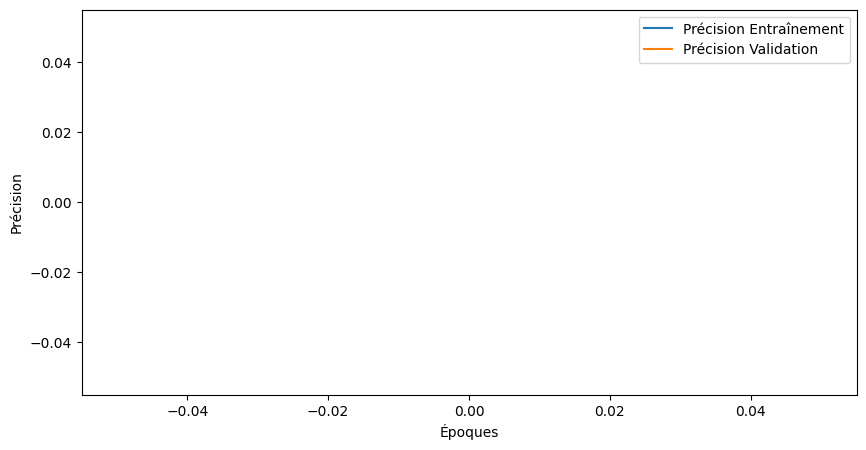


Époch 2 : La perte de validation a diminué à 3.8140. Modèle sauvegardé.
Précision validation : 0.2500

Prénoms générés :
- Acsch
- Bc
- Cc
- Dcsch
- Ec

Époch 3 : La perte de validation a diminué à 3.5956. Modèle sauvegardé.
Précision validation : 0.1667

Prénoms générés :
- Avh
- Bch
- C
- Dv
- Ec

Époch 4 : La perte de validation a diminué à 3.5178. Modèle sauvegardé.
Précision validation : 0.2000

Prénoms générés :
- A
- B
- Cv
- Dv
- E

Époch 5 : La perte de validation a diminué à 2.9196. Modèle sauvegardé.
Précision validation : 0.2500

Prénoms générés :
- A
- B
- C
- Dv
- E

Époch 20 : La perte de validation a diminué à 2.4649. Modèle sauvegardé.
Précision validation : 0.5000

Prénoms générés :
- Aasooo
- Basooooooooooooo
- Cashooooooooooooooooo
- Dasoooooooosoo
- Easoooo

Époch 69 : La perte de validation a diminué à 2.3851. Modèle sauvegardé.
Précision validation : 0.1111

Prénoms générés :
- Aarororoasok
- Barororiakok
- Caroririakok
- Darororiakok
- Earororitsok

Époch 92 : 

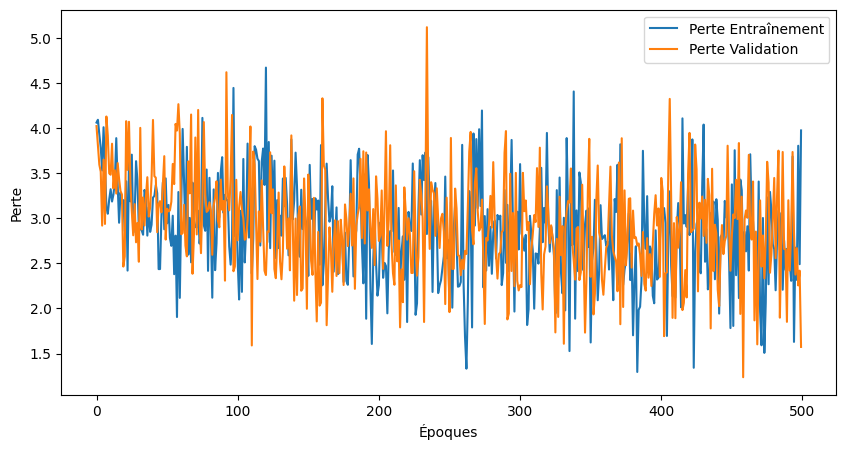

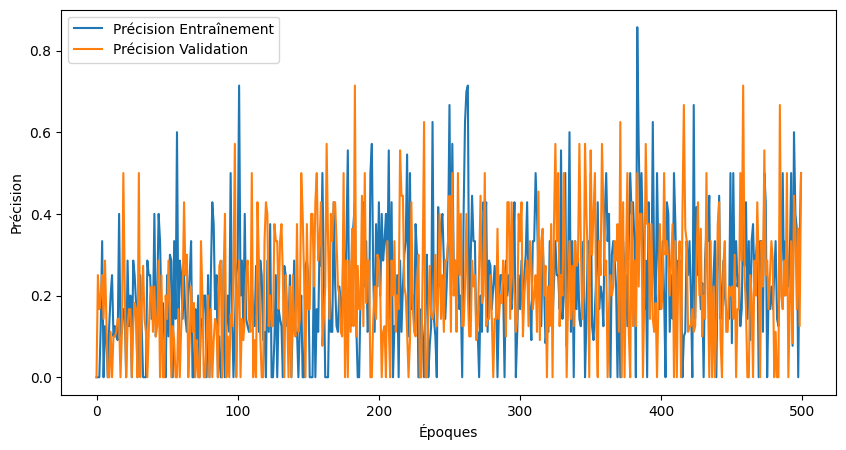


Époch 529 : La perte de validation a diminué à 1.2304. Modèle sauvegardé.
Précision validation : 0.6250

Prénoms générés :
- Aalakhav
- Belekh
- Cakhen
- Dalakhav
- Ealakhav

Époch 628 : La perte de validation a diminué à 1.0745. Modèle sauvegardé.
Précision validation : 0.7143

Prénoms générés :
- Aalin
- Balin
- Calin
- Dalin
- Ealin
0m 23.61s Époch 1000/3000, Perte entraînement : 2.1446, Précision entraînement : 0.2857
Perte validation : 1.9427, Précision validation : 0.5556


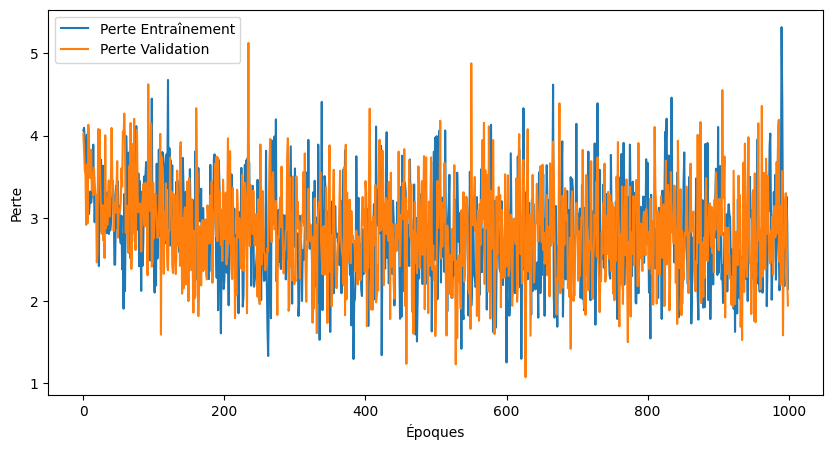

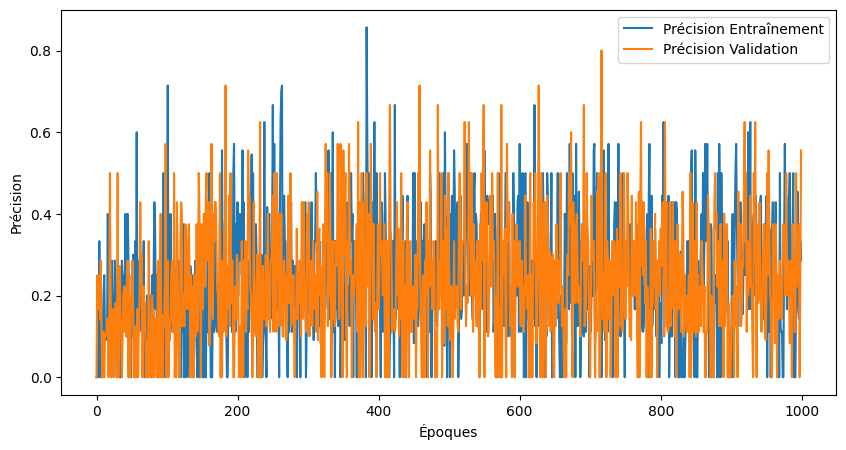

0m 35.02s Époch 1500/3000, Perte entraînement : 2.6398, Précision entraînement : 0.3000
Perte validation : 2.7949, Précision validation : 0.2000


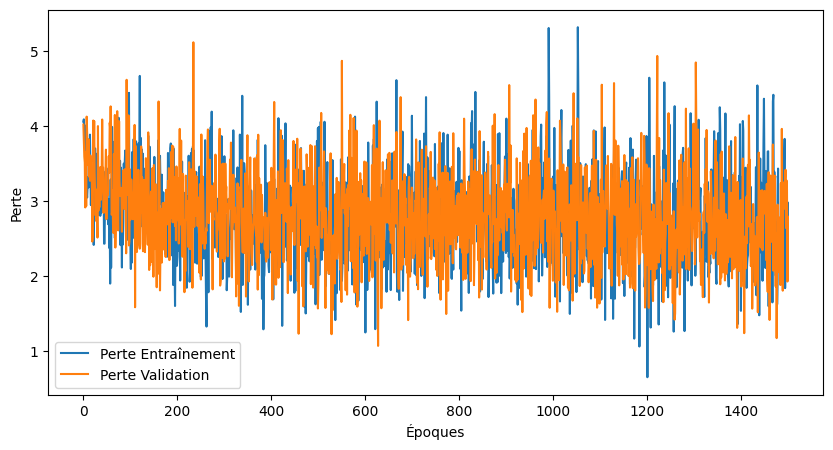

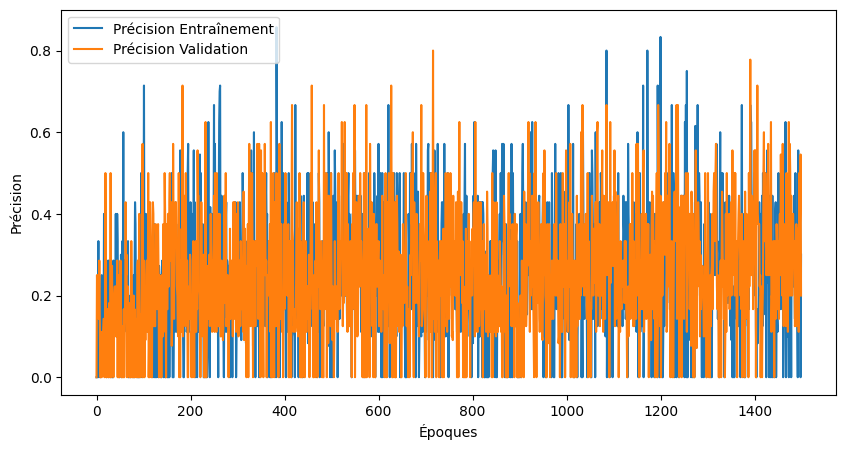


Époch 1792 : La perte de validation a diminué à 1.0132. Modèle sauvegardé.
Précision validation : 0.8333

Prénoms générés :
- Aatstuv
- Batstuv
- Catstev
- Dububov
- Eatutuv
0m 46.65s Époch 2000/3000, Perte entraînement : 2.8930, Précision entraînement : 0.0909
Perte validation : 1.6801, Précision validation : 0.2857


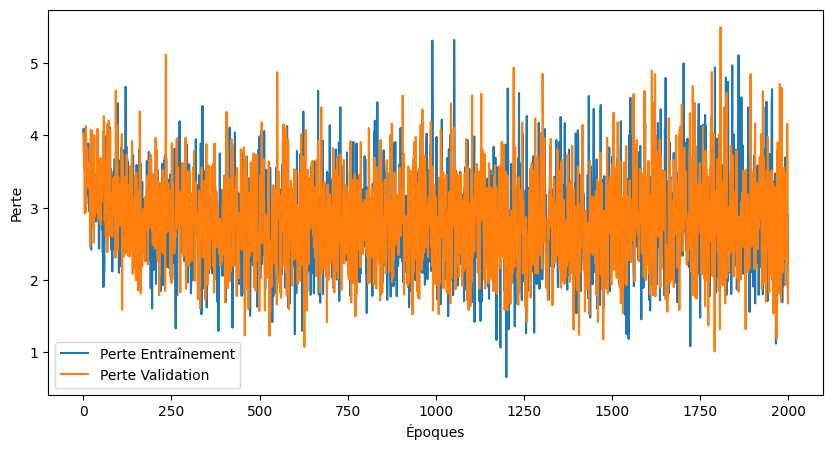

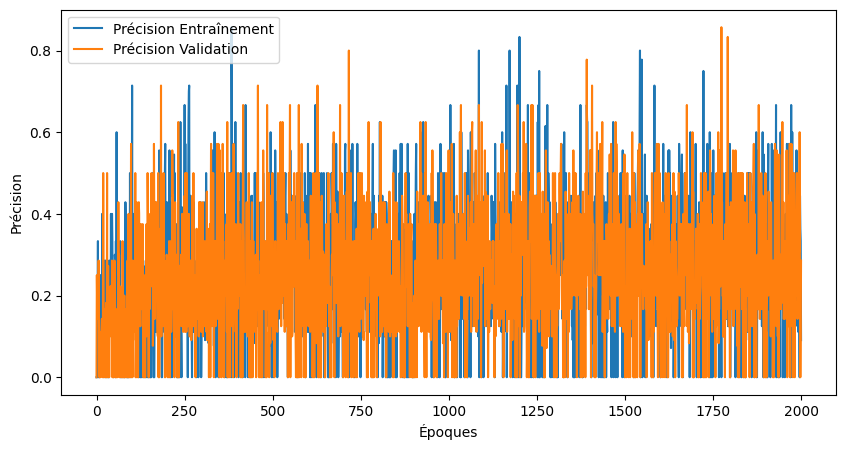


Époch 2446 : La perte de validation a diminué à 0.9905. Modèle sauvegardé.
Précision validation : 0.7500

Prénoms générés :
- Aalovakz
- Balouch
- Calov
- Del
- Eov
0m 58.47s Époch 2500/3000, Perte entraînement : 2.2057, Précision entraînement : 0.2500
Perte validation : 2.8185, Précision validation : 0.2000


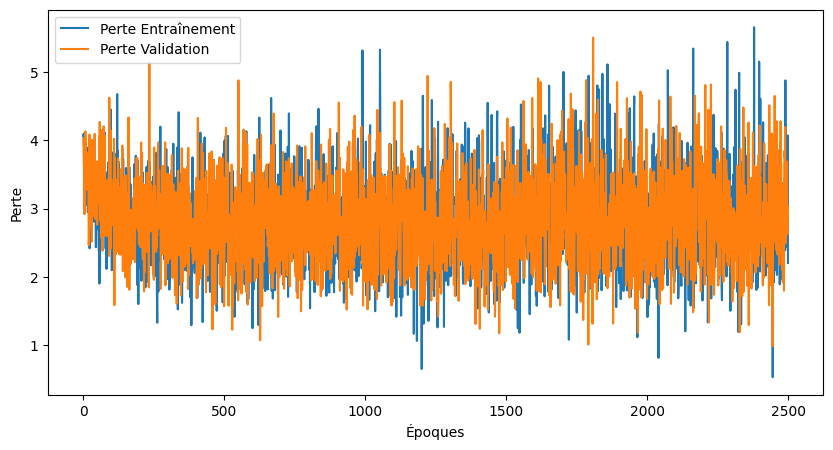

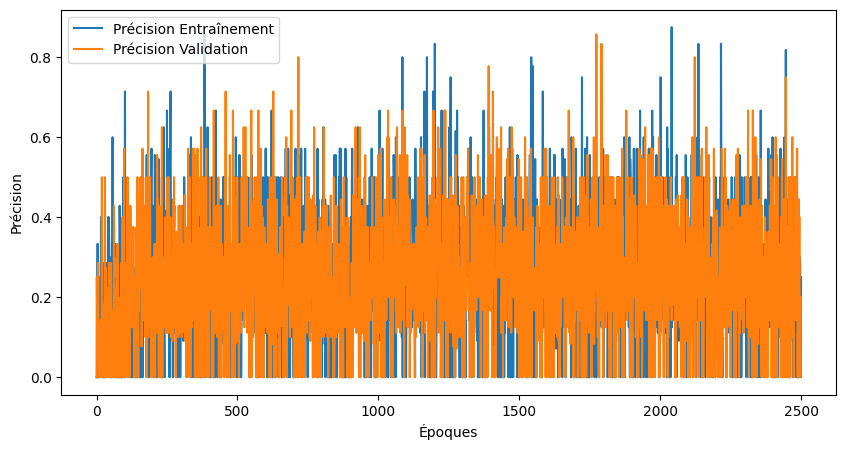


Époch 2618 : La perte de validation a diminué à 0.9779. Modèle sauvegardé.
Précision validation : 0.7778

Prénoms générés :
- Aagemokov
- Bagemekov
- Cagemon
- Dagemon
- Eagemonov
1m 10.07s Époch 3000/3000, Perte entraînement : 2.4713, Précision entraînement : 0.4444
Perte validation : 2.2924, Précision validation : 0.5000


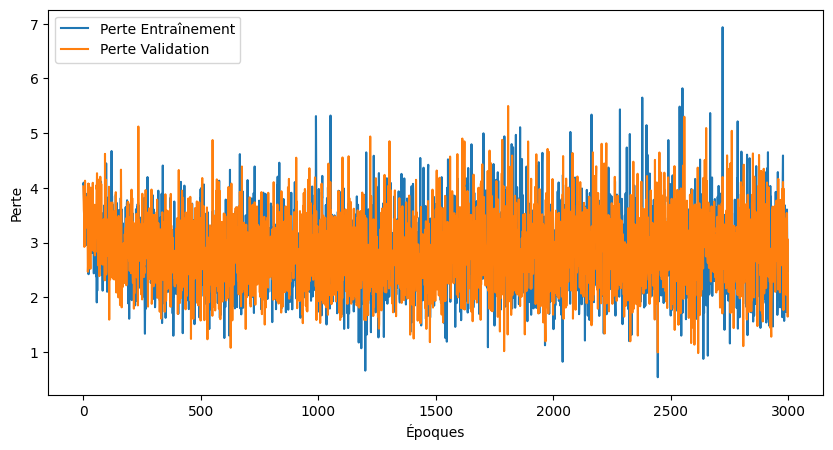

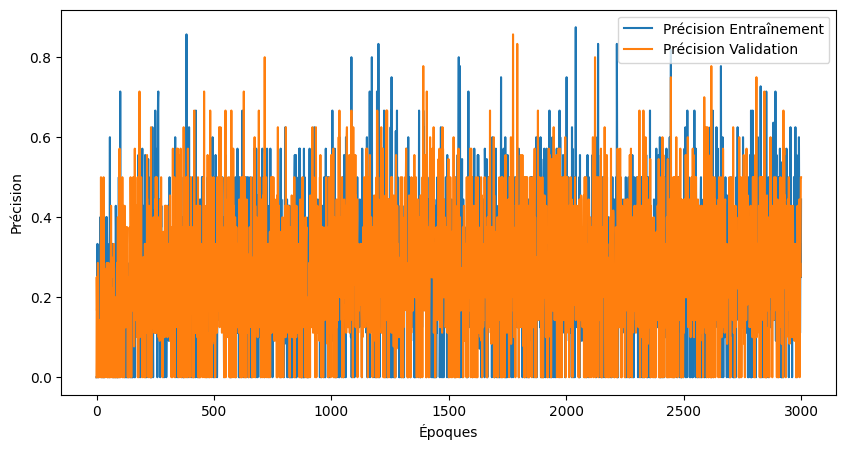


Chargement du meilleur modèle...

-----------
|  ÉVALUATION FINALE |
-----------

Perte moyenne sur l'ensemble de test : 2.7797
Précision moyenne sur l'ensemble de test : 0.2789

Prénoms générés avec le meilleur modèle :
- Bagemon
- Cagemon
- Dagemon
- Eagemon
- Fagemon
- Gagemon
- Hagemon
- Iagemon
- Jagemon
- Kagemon
- Magemon
- Nagemon
- Oagemon
- Sagemon
- Tagemon
- Uagemon
- Vagemon
- Xagemon
- Yagemon
- Zagemon


In [18]:
import requests
import torch
import torch.nn as nn
from torch.autograd import Variable
import time
import math
import string
import random
import os
import matplotlib.pyplot as plt

# Vérification GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Appareil utilisé : {device}")

# Téléchargement des données
url = "https://olivier-fabre.com/passwordgenius/russian.txt"
data_dir = "data"
os.makedirs(data_dir, exist_ok=True)
data_path = os.path.join(data_dir, "russian.txt")

if not os.path.exists(data_path):
    print("Téléchargement des données...")
    response = requests.get(url)
    with open(data_path, 'w', encoding='utf-8') as f:
        f.write(response.text)

# Chargement des données
def unicode_to_ascii(s):
    return ''.join(
        c for c in s if c in (string.ascii_letters + " .,;'-")
    )

def read_lines(filename):
    with open(filename, encoding='utf-8') as f:
        lines = f.readlines()

    # Filtrer et nettoyer les lignes
    clean_lines = []
    for line in lines:
        # Convertir en minuscules et supprimer les espaces autour
        line = line.strip().lower()
        # Vérifier que tous les caractères sont alphabétiques
        if all(c in string.ascii_letters for c in line) and len(line) >= 3:
            clean_lines.append(line)

    # Supprimer les doublons et trier les prénoms
    clean_lines = list(set(clean_lines))
    clean_lines.sort()

    return clean_lines




lines = read_lines(data_path)
print(f"Nombre de prénoms : {len(lines)}")

# Division des données
random.shuffle(lines)
train_split = int(0.7 * len(lines))
valid_split = int(0.2 * len(lines))
train_lines = lines[:train_split]
valid_lines = lines[train_split:train_split + valid_split]
test_lines = lines[train_split + valid_split:]
print(f"Ensemble d'entraînement : {len(train_lines)}, Validation : {len(valid_lines)}, Test : {len(test_lines)}")

# Paramètres globaux
all_letters = string.ascii_letters + " .,;'-"
n_letters = len(all_letters) + 1  # EOS marker
hidden_size = 256
n_layers = 3
lr = 0.003
bidirectional = True
max_length = 20
n_epochs = 3000

# Fonctions utilitaires
def char_tensor(string):
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = all_letters.index(string[c])
    return tensor

def input_tensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li in range(len(line)):
        letter = line[li]
        tensor[li][0][all_letters.find(letter)] = 1
    return tensor

def target_tensor(line):
    letter_indexes = [all_letters.find(line[li]) for li in range(1, len(line))]
    letter_indexes.append(n_letters - 1)  # EOS
    return torch.LongTensor(letter_indexes)

def random_training_example(lines):
    line = random.choice(lines)
    input_line_tensor = input_tensor(line)
    target_line_tensor = target_tensor(line)
    return input_line_tensor, target_line_tensor

# Fonction pour afficher le temps écoulé
def time_since(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return f"{m}m {s:.2f}s"

# Définition du modèle
class RNNLight(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNLight, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.bidirectional = bidirectional
        self.num_directions = 2 if self.bidirectional else 1
        self.rnn = nn.RNN(
            input_size=input_size, hidden_size=hidden_size,
            num_layers=n_layers, bidirectional=self.bidirectional, batch_first=True
        )
        self.out = nn.Linear(self.num_directions * hidden_size, output_size)
        self.dropout = nn.Dropout(0.1)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        _, hidden = self.rnn(input.unsqueeze(0), hidden)
        hidden_concat = hidden if not self.bidirectional else torch.cat((hidden[0], hidden[1]), 1)
        output = self.out(hidden_concat)
        output = self.dropout(output)
        return self.softmax(output), hidden

    def init_hidden(self):
        return torch.zeros(self.num_directions * n_layers, 1, self.hidden_size, device=device)

# Fonction pour générer des prénoms
def generate_prenoms(decoder, start_letters="ABCDE"):
    print("\nPrénoms générés :")
    for letter in start_letters:
        print(f"- {sample(decoder, letter)}")

def sample(decoder, start_letter="A"):
    with torch.no_grad():
        hidden = decoder.init_hidden()
        input = input_tensor(start_letter)
        output_name = start_letter.lower()  # Démarrer en minuscule pour le traitement
        for _ in range(max_length):
            output, hidden = decoder(input[0].to(device), hidden.to(device))
            topi = output.topk(1)[1][0][0]
            if topi == n_letters - 1:  # Fin de chaîne
                break
            else:
                letter = all_letters[topi]
                if letter.isalpha():  # Garder uniquement les lettres
                    output_name += letter.lower()
                else:
                    break  # Arrêter si un caractère non alphabétique est généré
            input = input_tensor(letter)
        # Capitaliser la première lettre et retourner le prénom
        return output_name.capitalize()


# Entraînement avec sauvegarde
def train(input_line_tensor, target_line_tensor, decoder, decoder_optimizer, criterion):
    target_line_tensor = target_line_tensor.to(device)
    hidden = decoder.init_hidden().to(device)
    decoder.zero_grad()
    loss = 0
    correct = 0  # Précision
    total = target_line_tensor.size(0)

    for i in range(input_line_tensor.size(0)):
        input_tensor = input_line_tensor[i].to(device)
        target_tensor = target_line_tensor[i].unsqueeze(0).to(device)
        output, hidden = decoder(input_tensor, hidden.detach())
        l = criterion(output, target_tensor)
        loss += l

        # Calcul de la précision
        predicted = output.topk(1)[1][0][0]
        correct += (predicted == target_tensor[0]).item()

    loss.backward()
    decoder_optimizer.step()

    accuracy = correct / total
    return loss.item() / input_line_tensor.size(0), accuracy

def validation(input_line_tensor, target_line_tensor, decoder, criterion):
    with torch.no_grad():
        target_line_tensor = target_line_tensor.to(device)
        hidden = decoder.init_hidden().to(device)
        loss = 0
        correct = 0
        total = target_line_tensor.size(0)

        for i in range(input_line_tensor.size(0)):
            input_tensor = input_line_tensor[i].to(device)
            target_tensor = target_line_tensor[i].unsqueeze(0).to(device)
            output, hidden = decoder(input_tensor, hidden.detach())
            l = criterion(output, target_tensor)
            loss += l

            # Calcul de la précision
            predicted = output.topk(1)[1][0][0]
            correct += (predicted == target_tensor[0]).item()

        accuracy = correct / total
        return loss.item() / input_line_tensor.size(0), accuracy

# Ajustement dynamique du taux d'apprentissage
def adjust_learning_rate(optimizer, epoch, decay_rate=0.5, step=20000):
    if epoch % step == 0 and epoch > 0:
        for param_group in optimizer.param_groups:
            param_group['lr'] *= decay_rate
            print(f"Taux d'apprentissage ajusté à : {param_group['lr']}")

# Suivi des pertes et précisions
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

# Fonction principale d'entraînement
def training(n_epochs, train_lines, valid_lines, decoder, decoder_optimizer, criterion):
    print("\n-----------\n|  ENTRAÎNEMENT  |\n-----------\n")
    start = time.time()
    best_loss = float("inf")
    model_path = "best_model_generation_prenom.pth"

    for epoch in range(1, n_epochs + 1):
        adjust_learning_rate(decoder_optimizer, epoch)

        input_line_tensor, target_line_tensor = random_training_example(train_lines)
        train_loss, train_acc = train(input_line_tensor, target_line_tensor, decoder, decoder_optimizer, criterion)

        input_line_tensor, target_line_tensor = random_training_example(valid_lines)
        val_loss, val_acc = validation(input_line_tensor, target_line_tensor, decoder, criterion)

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        if val_loss < best_loss:
            best_loss = val_loss
            torch.save(decoder.state_dict(), model_path)
            print(f"\nÉpoch {epoch} : La perte de validation a diminué à {best_loss:.4f}. Modèle sauvegardé.")
            print(f"Précision validation : {val_acc:.4f}")
            generate_prenoms(decoder)

        if epoch % 500 == 0 or epoch == 1:
            print(f"{time_since(start)} Époch {epoch}/{n_epochs}, Perte entraînement : {train_loss:.4f}, Précision entraînement : {train_acc:.4f}")
            print(f"Perte validation : {val_loss:.4f}, Précision validation : {val_acc:.4f}")

            # Afficher les graphiques interactifs
            plt.figure(figsize=(10, 5))
            plt.plot(train_losses, label='Perte Entraînement')
            plt.plot(val_losses, label='Perte Validation')
            plt.legend()
            plt.xlabel('Époques')
            plt.ylabel('Perte')
            plt.show()

            plt.figure(figsize=(10, 5))
            plt.plot(train_accuracies, label='Précision Entraînement')
            plt.plot(val_accuracies, label='Précision Validation')
            plt.legend()
            plt.xlabel('Époques')
            plt.ylabel('Précision')
            plt.show()

# Évaluation finale
def evaluate_model(test_lines, decoder, criterion):
    print("\n-----------\n|  ÉVALUATION FINALE |\n-----------\n")
    total_loss = 0
    total_correct = 0
    total_samples = 0
    decoder.eval()

    with torch.no_grad():
        for line in test_lines:
            input_line_tensor = input_tensor(line)
            target_line_tensor = target_tensor(line)
            loss, acc = validation(input_line_tensor, target_line_tensor, decoder, criterion)
            total_loss += loss
            total_correct += acc * len(line)
            total_samples += len(line)

    avg_loss = total_loss / len(test_lines)
    avg_accuracy = total_correct / total_samples
    print(f"Perte moyenne sur l'ensemble de test : {avg_loss:.4f}")
    print(f"Précision moyenne sur l'ensemble de test : {avg_accuracy:.4f}")

    # Génération de 20 prénoms uniques avec le meilleur modèle
    print("\nPrénoms générés avec le meilleur modèle :")
    generated_names = set()
    attempts = 0  # Limiter les tentatives pour éviter les boucles infinies
    while len(generated_names) < 20 and attempts < 50:
        start_letter = random.choice(string.ascii_uppercase)  # Démarrer avec une lettre majuscule
        name = sample(decoder, start_letter)
        if len(name) >= 3:  # Assurer une taille minimale de 3 lettres
            generated_names.add(name)
        attempts += 1

    # Afficher les prénoms générés
    for name in sorted(generated_names):  # Trier pour lisibilité
        print(f"- {name}")




# Exécution principale
if __name__ == "__main__":
    decoder = RNNLight(n_letters, hidden_size, n_letters).to(device)
    decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr, weight_decay=1e-5)
    criterion = nn.CrossEntropyLoss()

    print("Démarrage de l'entraînement...")
    training(n_epochs, train_lines, valid_lines, decoder, decoder_optimizer, criterion)

    print("\nChargement du meilleur modèle...")
    # Chargement sécurisé pour éviter tout code malveillant
    state_dict = torch.load("best_model_generation_prenom.pth", map_location=device, weights_only=True)
    decoder.load_state_dict(state_dict)
    evaluate_model(test_lines, decoder, criterion)